In [4]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)

In [6]:
print(client.scheduler_info()['services'])


{'dashboard': 8787}


In [10]:
import dask.bag as db
b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=2)
b

dask.bag<from_sequence, npartitions=2>

In [11]:
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [12]:
from dask import datasets
import dask.dataframe as dd
df = datasets.timeseries()

In [13]:
df

Dask DataFrame Structure:
                   id    name        x        y
npartitions=30                                 
2000-01-01      int32  object  float64  float64
2000-01-02        ...     ...      ...      ...
...               ...     ...      ...      ...
2000-01-30        ...     ...      ...      ...
2000-01-31        ...     ...      ...      ...
Dask Name: make-timeseries, 30 tasks

In [24]:
from dask import delayed
@delayed
def inc(x):
    sum = 0
    for _ in range(1000000000):
        sum += x
    return sum + 1
@delayed
def add(x, y):
    return x + y

x = inc(15)
y = inc(30)
total = add(x, y)


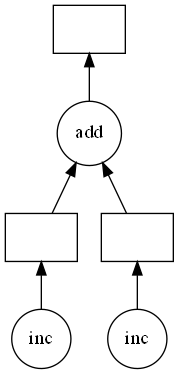

In [25]:
total.visualize()

In [26]:
total.compute()

45000000002

In [27]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [28]:
from dask import delayed
def inc(x):
    return x + 1
def dec(x):
    return x - 1
def add(x, y):
    return x + y
from dask.distributed import Client
c = Client(n_workers=4)

x = c.submit(inc, 1)
y = c.submit(dec, 2)
total = c.submit(add, x, y)


In [31]:
total.result()

3

In [38]:
from dask.distributed import progress
# to show progress bar
from dask.distributed import as_completed
def func(x):
    y = 0
    for _ in range(10000000000):
        y += x
    return y
futures = [c.submit(func, x) for x in range(10)]
iterator = as_completed(futures)
for res in iterator:
    print("RES Y :",res.result())



RES Y : 0
RES Y : 50000000
RES Y : 70000000
RES Y : 30000000
RES Y : 60000000
RES Y : 20000000
RES Y : 90000000
RES Y : 80000000
RES Y : 40000000
RES Y : 10000000


In [40]:
c.close()